In [41]:
import pandas as pd

import numpy as np
import pickle

from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

from ref_calcs import friend_percentile

# Exploring RPE for people doing repeated tests.

In [42]:
df = pd.read_excel("./data/Longitudinal_FRIEND_dataset_3_31_22.xlsx")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unique_id          2040 non-null   object        
 1   testdate           2040 non-null   datetime64[ns]
 2   yrs_btw_cpx        1020 non-null   float64       
 3   test_order         2040 non-null   int64         
 4   ageattest          2040 non-null   int64         
 5   sex                2040 non-null   object        
 6   Country            2040 non-null   object        
 7   ethnicgroup        2034 non-null   object        
 8   employment_status  1126 non-null   float64       
 9   educlevel          969 non-null    float64       
 10  marital_status     1138 non-null   float64       
 11  ANYCVD             2040 non-null   int64         
 12  COPD               1332 non-null   float64       
 13  Hypertension       1309 non-null   float64       
 14  CKD     

In [44]:
# Add in the FRIEND percentiles

df["FRIEND_perc"] = df.apply(lambda x: friend_percentile(x.vo2_ml_kg_min, x.ageattest, x.sex, x.Mode),
                            axis=1)

In [46]:
# Drop those sites with 100% of tests with RPE <11 (so NOT using Borg scale).
df = df.query("Facility != 'SFU' & Facility != 'TUKHS'")
# Drop non-USA Facilities:
df = df.query("Facility != 'UNIFESP_EPIMOV'")

df.Facility.unique()

array(['Ball State', 'MCH', 'SAMMC', 'Hartford Hospital',
       'University of Massachusetts'], dtype=object)

## Create Graphs.

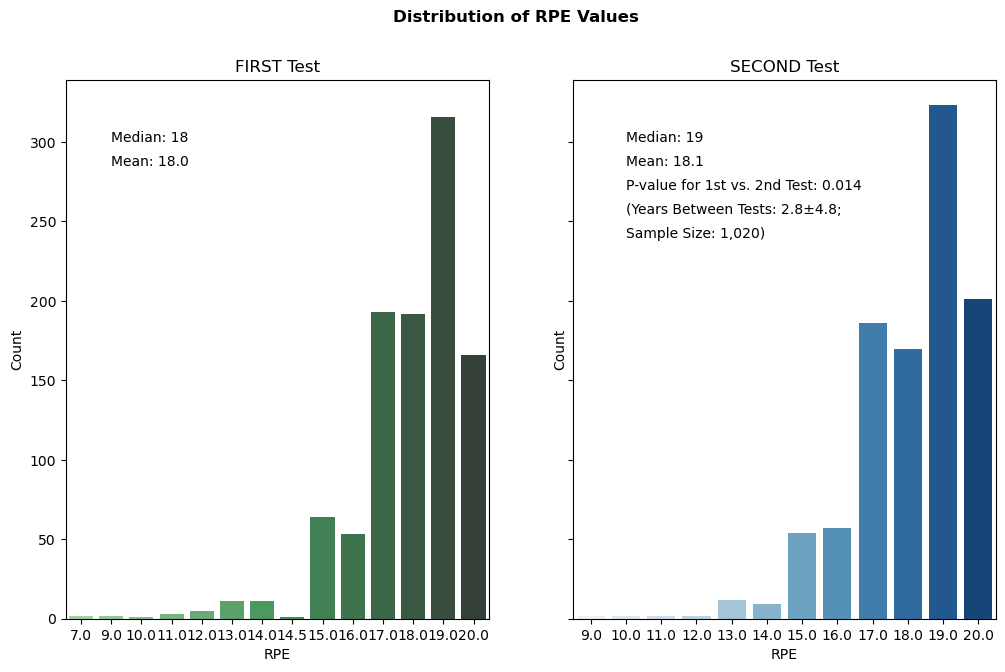

In [107]:
fig, ax = plt.subplots(1,2, sharey=True, figsize = (12,7))
fig.suptitle("Distribution of RPE Values",weight='bold')

# Graph the distribution for the first test.
sns.countplot(ax=ax[0],
              x=df.query("test_order == 1")["peak_rpe"],
             data=df,
             palette="Greens_d")
ax[0].set_ylabel('Count')
ax[0].set_xlabel('RPE')

ax[0].set_title('FIRST Test')

# Add in mean and median.
avg = np.mean(df.query("test_order == 1")["peak_rpe"])
med = np.median(df.query("test_order == 1")["peak_rpe"])
ax[0].text(1, 285, f"Mean: {avg:.1f}", horizontalalignment='left', size='medium', color='black')
ax[0].text(1, 300, f"Median: {med:.0f}", horizontalalignment='left', size='medium', color='black')

# Graph the distribution for the second test.
sns.countplot(ax=ax[1],
              x=df.query("test_order == 2")["peak_rpe"],
             data=df,
             palette="Blues")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('RPE')
ax[1].set_title('SECOND Test')

# Add in mean and median.
avg = np.mean(df.query("test_order == 2")["peak_rpe"])
med = np.median(df.query("test_order == 2")["peak_rpe"])
ax[1].text(1, 285, f"Mean: {avg:.1f}", horizontalalignment='left', size='medium', color='black')
ax[1].text(1, 300, f"Median: {med:.0f}", horizontalalignment='left', size='medium', color='black')

# Add in the p-value for comparisons.
from scipy.stats import ttest_rel
# Python paired sample t-test
res = ttest_rel(df.query("test_order == 1")["peak_rpe"], df.query("test_order == 2")["peak_rpe"])
ax[1].text(1, 270, f"P-value for 1st vs. 2nd Test: {res.pvalue:.3f}", 
           horizontalalignment='left', size='medium', color='black')

# Add in years between tests.
yrs_mean = np.mean(df.query("test_order == 2")["yrs_btw_cpx"])
yrs_std = np.std(df.query("test_order == 2")["yrs_btw_cpx"])
ax[1].text(1, 255, f"(Years Between Tests: {yrs_mean:.1f}±{yrs_std:.1f};", 
           horizontalalignment='left', size='medium', color='black')

# Add in sample size.
ax[1].text(1, 240, f"Sample Size: {round(len(df)/2):,})", 
           horizontalalignment='left', size='medium', color='black')

# plt.savefig('rpe_longitudinal.tif', facecolor='white', dpi=150)
plt.show()

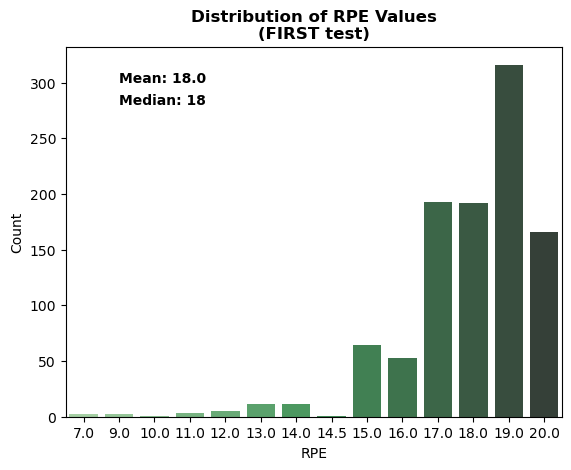

In [85]:
sns.countplot(x=df.query("test_order == 1")["peak_rpe"],
             data=df,
             palette="Greens_d")
plt.ylabel('Count')
plt.xlabel('RPE')
# plt.xlim(0,20)
# plt.xticks(list(range(2,21,2)))
plt.title('Distribution of RPE Values\n(FIRST test)', weight='bold')

# Add in mean and median.
avg = np.mean(df.query("test_order == 1")["peak_rpe"])
med = np.median(df.query("test_order == 1")["peak_rpe"])
plt.text(1, 300, f"Mean: {avg:.1f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(1, 280, f"Median: {med:.0f}", horizontalalignment='left', size='medium', color='black', weight='semibold')


plt.show()

In [86]:
# T-test to compare first and second tests.

from scipy.stats import ttest_rel

# Python paired sample t-test
res = ttest_rel(df.query("test_order == 1")["peak_rpe"], df.query("test_order == 2")["peak_rpe"])

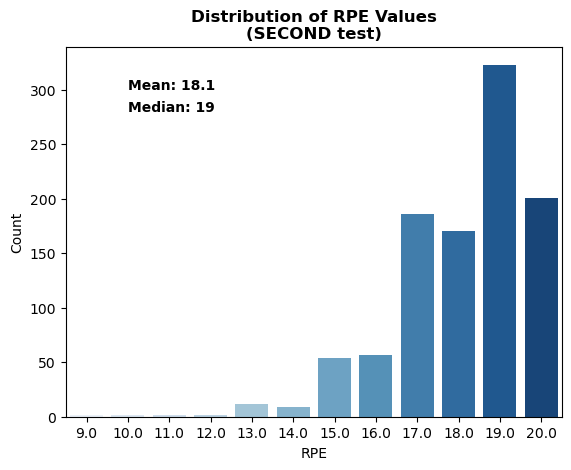

In [87]:
sns.countplot(x=df.query("test_order == 2")["peak_rpe"],
             data=df,
             palette="Blues")
plt.ylabel('Count')
plt.xlabel('RPE')
# plt.xlim(0,20)
# plt.xticks(list(range(2,21,2)))
plt.title('Distribution of RPE Values\n(SECOND test)', weight='bold')

# Add in mean and median.
avg = np.mean(df.query("test_order == 2")["peak_rpe"])
med = np.median(df.query("test_order == 2")["peak_rpe"])
plt.text(1, 300, f"Mean: {avg:.1f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(1, 280, f"Median: {med:.0f}", horizontalalignment='left', size='medium', color='black', weight='semibold')


plt.show()

In [52]:
res.pvalue

0.014004624966597793